# 2. Training Simple Machine Learning Algorithms for Classification

## Definition of Artificial Neuron

The decision function $\sigma(z)$ using **unit step function**
$$
\sigma(z) = \begin{cases} 
1 & \text{if } z \geq \theta \\
0 & \text{otherwise}
\end{cases}
$$

$$z = w_1x_1+...+w_mx_m=w^Tx$$
Where:
* $x_1,x_2,...,x_n$ are the inputs to the neuron
* $w_1,w_2,...,w_n$ are the weights
* $z$ is the net input

Where: $$z \geq \theta$$ $$z-\theta \geq 0$$ $$b = - \theta$$
Where $\theta$ is the threshold and $b$ is the bias. The threshold is a value that helps determine the output of a model function.

So 
$$z = w_1x_1+...+w_mx_m+b=w^Tx+b$$
$$
\sigma(z) = 
\begin{cases}
1 & \text{if } z \geq 0 \\
0 & \text{otherwise}
\end{cases}

$$

## The perceptron learning rule


1. Initialize the weights and bias unit to 0 or small random numbers
2. For each $x^{(i)}$:
    1. Compute the output value, $ŷ^{(i)}$
    2. Update the weight and bias unit

The simultaneous update of the bias unit and each weight, $w_j$, can be more formally written as:
$$
w_j:= w_j + \Delta w_j \\
b := b + \Delta b
$$

The update values ("deltas") are computed as follows:
$$
\Delta w_j = \eta (y^{(i)} - ŷ^{(i)}) x_{j}^{(i)} \\
\Delta b = \eta (y^{(i)} - ŷ^{(i)})
$$

Where $\eta$ is the learning rate.

### Scenario 1: Predicts the class correctly
$$y=ŷ$$
The bias unit and weights remain unchanged, since the update values are 0
### Scenario 2: Wrong prediction
$$y\neq ŷ$$
The weights are being pushed toward the direction of the positive or negative target class

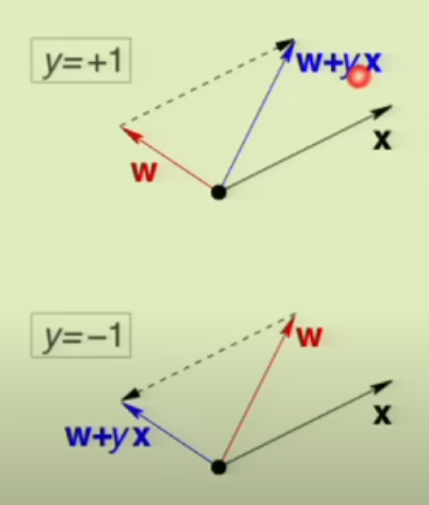

*Image from Lecture 01 from Abu Mostafa, Machine Learning Course*

**Inner product:** $a \cdot b = |a| |b| \cos(\alpha)$
* < 90º : positive
* \> 90º : negative
* == 90º : 0

#### <span style="color: red;">**CONVERGENCE OF PERCEPTRON IS ONLY GUARANTEED IF THE TWO CLASSES ARE LINEARLY SEPARABLE**</span>


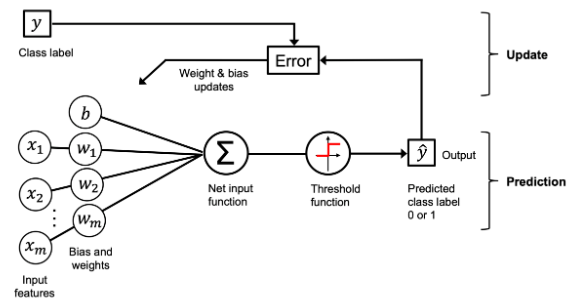

## Implementing a perceptron learning algorithm in Python

In [1]:
import numpy as np

In [ ]:
class Perceptron:
    """
    Perceptron Classifier

    Parameters
    -----------
    lr : float
        Learning rate
    n_iter : int
        Maximum number of iterations(epochs) over the training dataset
    random_state : int
        Random number seed

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting
    b_ : Scalar
        Bias after fitting
    errors_ : list
        Number of misclassifications (updates) in each epoch

    """

    def __init__(self, lr: float = 0.01, n_iter: int = 50, random_state: int = 1):
        self.lr = lr
        self.n_iter = n_iter
        self.random_state = random_state

    def fit_initial_weights_to_zero(self, X, y):
        """
        Fit training data initializing weights to 0 (Only for comparison purposes, random initialization is better)

        Parameters
        -----------
        X : {array-like}, shape = [n_examples, n_features])
            Training vectors
        y : array-like, shape = [n_examples]
            Target vector

        Returns
        --------
        self: object


        """

        # Initialize weights to 0
        self.w_ = np.zeros(X.shape[1])
        self.b_ = np.float_(0.0)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def fit(self, X, y):
        """
        Fit training data

        Parameters
        -----------
        X : {array-like}, shape = [n_examples, n_features])
            Training vectors
        y : array-like, shape = [n_examples]
            Target vector

        Returns
        --------
        self: object


        """

        # Initialize weights
        rgen = np.random.RandomState(seed=self.random_state)
        self.w_ = rgen.normal(
            loc=0.0, scale=0.1, size=X.shape[1]
        )  # Scale(STD) is used small in order to generate small numbers
        self.b_ = np.float_(0.0)

        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

#### **If we initialize the weights to zero as the original perceptron algorithm, the lr would have no effect on the decision boundary. If all weights are initialized to zero, the lr parameter affects only the scale of the weight vector, not the direction.**

This is because the decision function used in perceptron algorithm depends only on the sign of $z$ :
$$
\sigma(z) = 
\begin{cases}
1 & \text{if } z \geq 0 \\
0 & \text{otherwise}
\end{cases}
$$

Considering the predicted class label $ŷ^{(1)} = \sigma(w^{(0)}x^{(1)})$ and the weight update $\Delta w^{(1)} = \eta (y^{(1)} - ŷ^{(1)})x^{(1)}$ where $\eta \in (0,1)$ the new weights are $w^{(1)} = w^{(0)} + \Delta w^{(1)}$

And the predicted class label $ŷ^{(2)} = \sigma(w^{(1)}x^{(2)})$ and the weight update $\Delta w^{(2)} = \eta (y^{(2)} - ŷ^{(2)})x^{(2)}$

Notice that $\Delta w^{(2)}$ implicitly depends on $\Delta w^{(1)}$, which in turn implicitly depends on $w^{(0)}$. Let us unravel these dependencies by plugging in:
$$
\begin{align}
\Delta w^{(2)} &= \eta (y^{(2)} - ŷ^{(2)}) x^{(2)}\\
&= \eta (y^{(2)} - \sigma(w^{(1)}x^{(2)})) x^{(2)}\\
&= \eta (y^{(2)} - \sigma(w^{(0)} + \Delta w^{(1)}x^{(2)})) x^{(2)}\\
&= \eta (y^{(2)} - \sigma(w^{(0)} + \eta (y^{(1)} - ŷ^{(1)})x^{(1)}x^{(2)})) x^{(2)}\\
&= \eta (y^{(2)} - \sigma(w^{(0)} + \eta (y^{(1)} - \sigma(w^{(0)}x^{(1)}))x^{(1)}x^{(2)})) x^{(2)}\\

\end{align}
$$

Now suppose we have initialized with zero $w^{(0)} = 0$ 
$$
\begin{align}
\Delta w^{(2)} &= \eta (y^{(2)} - \sigma(0 + \eta (y^{(1)} - \sigma(0 x^{(1)}))x^{(1)}x^{(2)})) x^{(2)} \\
 &= \eta (y^{(2)} - \sigma(\eta (y^{(1)} - 1)x^{(1)}x^{(2)})) x^{(2)} \\

\end{align}
$$

Let us zoom in here and look at $\sigma$ and its argument:

$$
\sigma(\eta (y^{(1)} - 1)x^{(1)}x^{(2)})
$$

Since $\eta > 0$, it does not change the sign of $(y^{(1)} - 1)x^{(1)}x^{(2)}$. But the sign is al that matters to the function $\sigma$. So we can simply remove the learning rate from the function argument without changing the result. The same arguments hold for $\Delta w^{(3)},\Delta w^{(4)},...$

(https://datascience.stackexchange.com/questions/26134/initialize-perceptron-weights-with-zero#:~:text=If%20you%20choose%20zero%20initial,z%E2%89%A50%E2%88%921%20otherwise)



#### **Why do we initialize the weights to very small values?**

*"If the weights are too large, when you compute the activation values, $z = w^T x + b$ will be either very big or very small. And so in that case, you're more likely to end up at these flat parts where the slope or gradient is very small(shown in image) meaning that gradient descent will be very slow and so learning will be very slow."* - **Andrew NG**

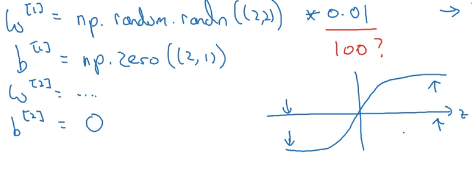

(https://www.coursera.org/lecture/neural-networks-deep-learning/random-initialization-XtFPI)

#### **Using trigonometry to demonstrate why lr only affects the scale of weight vector and not the direction when weights are initialized to 0 (ML with PyTorch and Scikit-Learn Book)**
Consider a vector, v1 = [1 2 3], where the angle between *v1* and a vector, *v2* = 0.5 x *v1*, would be exactly zero, as demonstrated by the following code snippet:

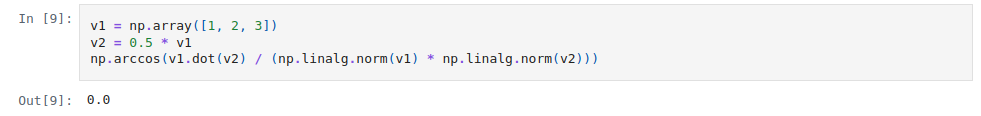

Here, `np.arccos` is the trigonometric inverse cosine, and `np.linalg.norm` is a function that computes the length of a vector

## Training perceptron model on the Iris dataset

* **OvA(one-versus-all)** or **OvR(one-versus-rest)**: is a technique that allows to extend any binary classifier as Perceptron to multi-class problems. Using OvA, we can train one classifier per class, where the particular class is treated as the positive class and the examples from all other classes are considered negative classes. If we were to classify a new, unlabeled data instance, we would use our *n* classifiers, where *n* is the number of class labels, and assign the class label with the highest confidence to the particular instance we want to classify. In the case of the perceptron, we would use OvA to choose the class label that is associated with the largest absolute net input value.

In [3]:
import os
import pandas as pd

s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(s, header=None, encoding="utf-8")

In [ ]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


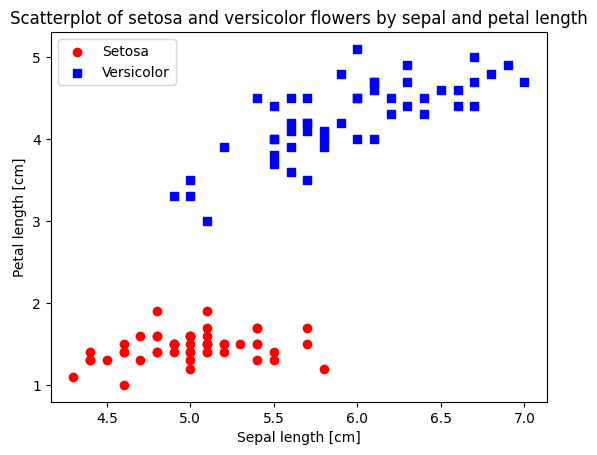

In [5]:
import matplotlib.pyplot as plt

# select setosa and versicolor
y = df[:100][4].values
y = np.where(y == "Iris-setosa", 0, 1)
# extract sepal length and petal length
X = df[:100][[0, 2]].values
# plot data
setosa_instances_i, setosa_instances_j = zip(
    *[[x_i[0], x_i[1]] for x_i, y_i in zip(X, y) if y_i == 0]
)
versicolor_instances_i, versicolor_instances_j = zip(
    *[[x_i[0], x_i[1]] for x_i, y_i in zip(X, y) if y_i == 1]
)
plt.scatter(
    setosa_instances_i, setosa_instances_j, color="red", marker="o", label="Setosa"
)
plt.scatter(
    versicolor_instances_i,
    versicolor_instances_j,
    color="blue",
    marker="s",
    label="Versicolor",
)
plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend()
plt.title("Scatterplot of setosa and versicolor flowers by sepal and petal length")
plt.show()

In this two-dimensional feature subspace, we can see that a linear decision boundary should be sufficient to separate setosa from versicolor flowers. Thus a linear classifier such as the perceptron should be able to classify the flowers in this dataset perfectly.

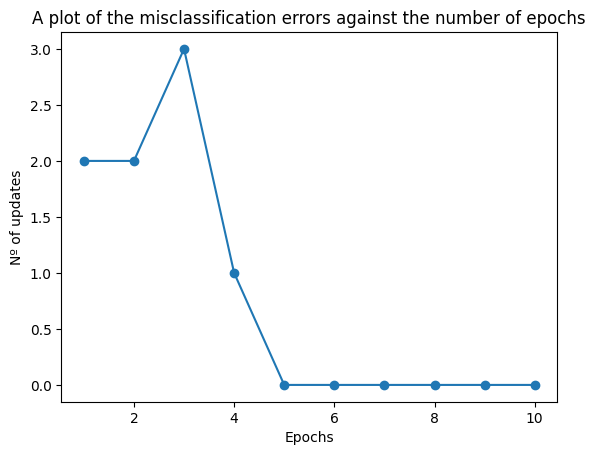

In [ ]:
ppn = Perceptron(lr=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Nº of updates")
plt.title("A plot of the misclassification errors against the number of epochs")
plt.show()

As we can see in the figure, our perceptron converged after 5 epochs and should now be able to classify the training examples perfectly.

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(
    X, y, classifier, resolution=0.02, xlabel="", ylabel="", title=""
):
    # setup marker generator and color map
    markers = ("o", "s", "^", "v", "<")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)
    )
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class instances
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            X[y == cl, 0],
            X[y == cl, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f"Class {cl}",
            edgecolors="black",
        )

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()

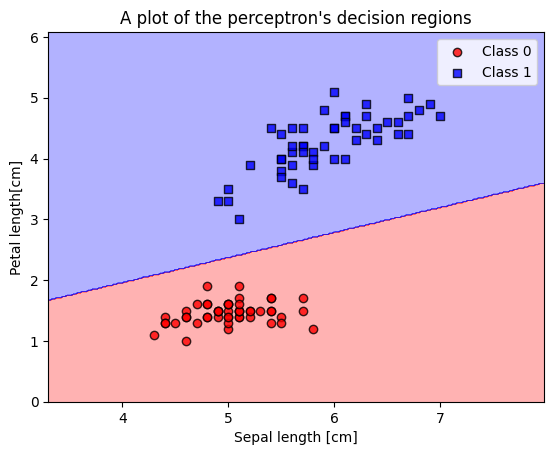

In [8]:
plot_decision_regions(
    X,
    y,
    classifier=ppn,
    xlabel="Sepal length [cm]",
    ylabel="Petal length[cm]",
    title="A plot of the perceptron's decision regions",
)

As we can see in the plot, the perceptron learned a decision boundary that can classify all flower examples in the Iris training subset perfectly. Convergence is one of the biggest problems of the perceptron. Rosenblatt proved mathematically that the perceptron learning rule converges if the two classes can be separated by a linear hyperplane. However, if the classes cannot be separated perfectly by such a linear decision boundary, the weights will never stop updating unless we set a maximum number of epochs

#### Comparison of initial weights

In [9]:
ppn_2 = Perceptron(lr=0.1, n_iter=10)
ppn_2.fit_initial_weights_to_zero(X, y)

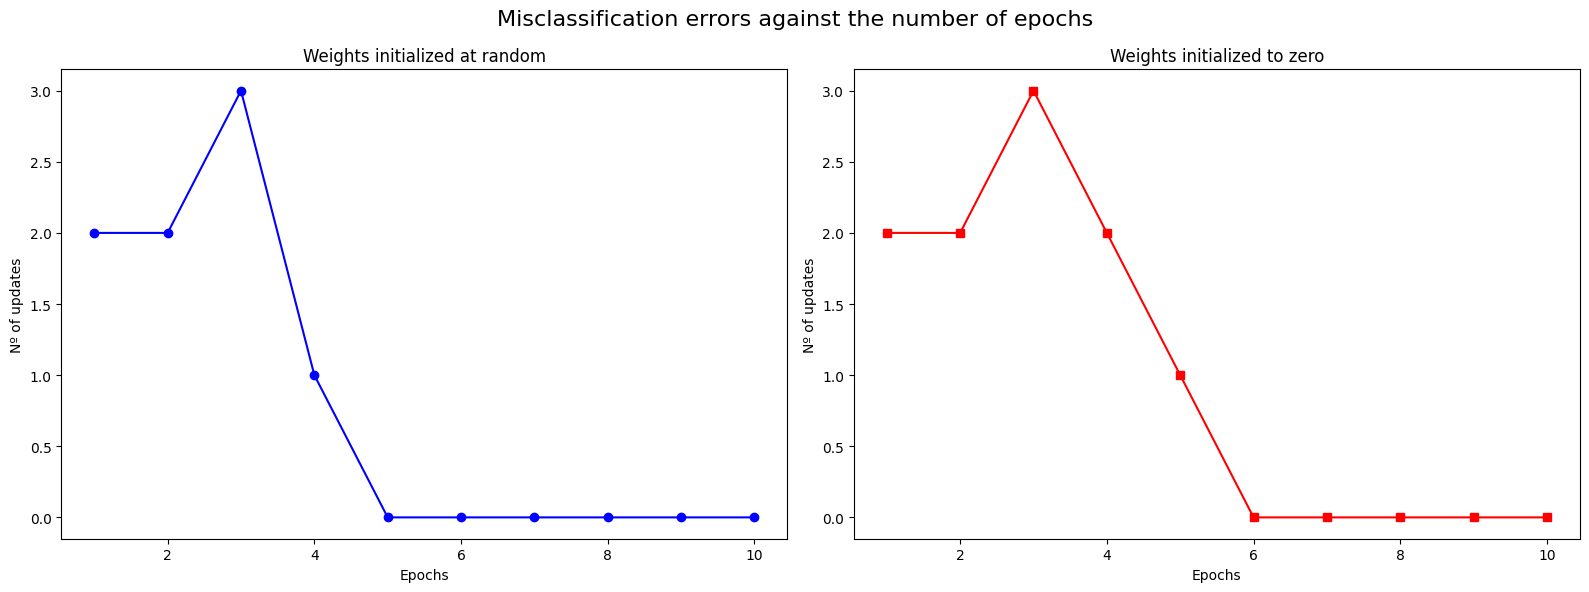

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot first subplot
ax1.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker="o", c="blue")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Nº of updates")
ax1.set_title("Weights initialized at random")

# Plot second subplot
ax2.plot(range(1, len(ppn_2.errors_) + 1), ppn_2.errors_, marker="s", c="red")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Nº of updates")
ax2.set_title("Weights initialized to zero")

fig.suptitle("Misclassification errors against the number of epochs", fontsize=16)
plt.tight_layout()
plt.show()

Perceptron with weights initialized to 0 converged after 6 epochs (1 epoch more compared to perceptron with randomly initialized weights) and should also be able to classify the training examples perfectly.

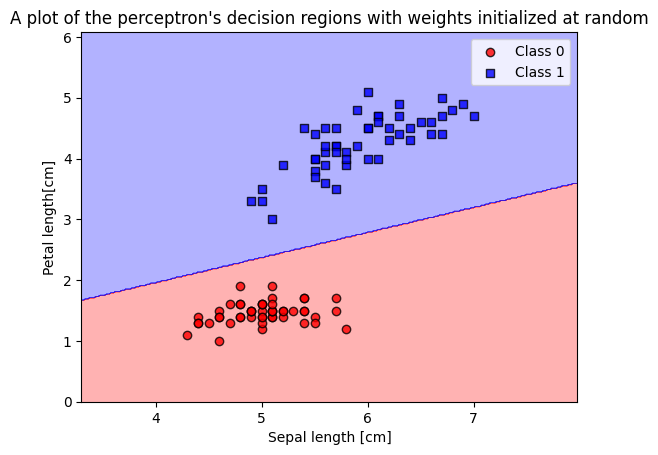

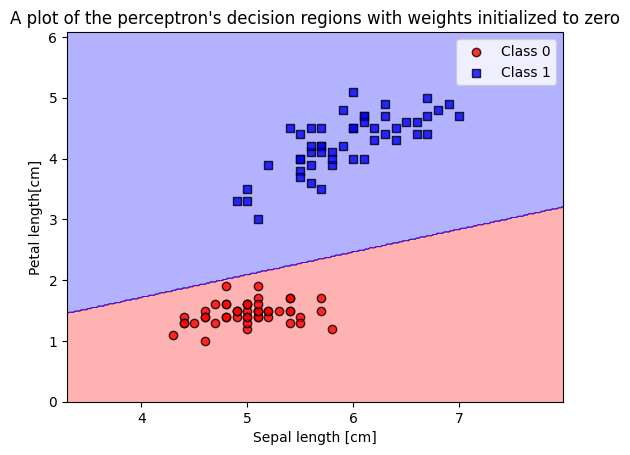

In [ ]:
plot_decision_regions(
    X,
    y,
    classifier=ppn,
    xlabel="Sepal length [cm]",
    ylabel="Petal length[cm]",
    title="A plot of the perceptron's decision regions with weights initialized at random",
)
plot_decision_regions(
    X,
    y,
    classifier=ppn_2,
    xlabel="Sepal length [cm]",
    ylabel="Petal length[cm]",
    title="A plot of the perceptron's decision regions with weights initialized to zero",
)

ppn1 -> perceptron with weights initialized at random

ppn2 -> perceptron with weights initialized to 0

**Personal conclusion:** As we can see, the decision boundary learned by both models differs slightly and we can assume that ppn1 has a better hyperplane due to its larger margin. The margin is the distance between the hyperplane and the closest data points of each class. A better margin usually results in better overall performance on unseen test datasets.

## Adaptive linear neurons and the convergence of learning

It can be considered an improvement on the Rosenblatt's perceptron algorithm. The Adaline algorithm is particularly interesting because it illustrates the key concepts of defining and minimizing continuous loss functions. The key difference between Adaline rule (also known as the Windrow-Hoff rule) and Rosenblatt's perceptron is that he weights are updated based on a linear activation function rather than a unit step function. In Adaline, this linear activation function, $\sigma (z)$, is simply the identity function of the net input, so that $\sigma(z)=z$

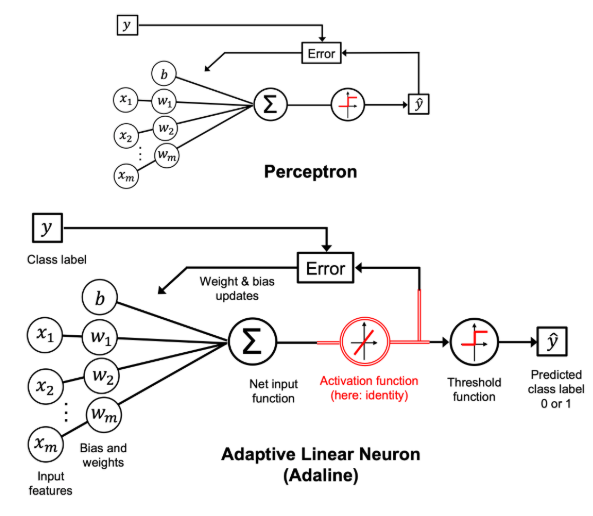

## Minimizing loss function with gradient descent

One of the jey ingredients of supervised machine learning algorithms is a defined **objective function** (loss or cost function) that is to be optimized during the learning process. In the case of Adaline, we can define the loss function, *L*, to learn the model parameters as the **mean squared error(MSE)** between the calculated outcome and the true class label:
$$
L(w,b) = \frac{1}{n} \sum_{i=1}^{n}(y^{(i)} - \sigma (z^{(i)}))^2
$$

The main advantage of this continuous linear activation function, in contrast to the unit step function, is that the loss function becomes differentiable. Another nice property is that it os convex; thus, wer can use a very sime yet powerful optimization algorithm called **gradient descent** to find the weights that minimize our loss function. In each iteration, we take a step in the opposite direction of the gradient. The step size and slope of the gradient is determined by lr.

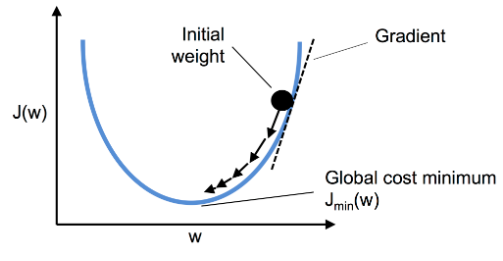




Using gradient descent, we can update the model parameters by taking a step in the opposite direction of the gradient, $\Delta L(w,b)$, of the loss function $L(w,b)$:
$$
w:= w+\Delta w, b:=n+\Delta b

$$

where $\Delta w$ and $\Delta b$ are defined as the negative gradient multiplied by lr

$$
\Delta w = - \eta \nabla_{w}L(w,b), \Delta b = - \eta \nabla_{b}L(w,b) 
$$

To compute the gradient of the loss function, we need to compute the partial derivative if the loss function respect to each weight, $w_j$:
$$
\begin{align}
\frac{\partial L}{\partial w_j} &= \frac{2}{n} \sum_{i} (y^{(i)} - \sigma (z^{(i)})) \frac{\partial}{\partial w_j}(y^{(i)} - \sigma (z^{(i)})) \\
&= \frac{2}{n} \sum_{i} (y^{(i)} - \sigma (z^{(i)})) \frac{\partial}{\partial w_j}(y^{(i)} - \sum_{j}(w_j x_j^{(i)} + b)) \\
&= \frac{2}{n} \sum_{i} (y^{(i)} - \sigma (z^{(i)})) (- x_{j}^{(i)}) \\
&= - \frac{2}{n} \sum_{i} (y^{(i)} - \sigma (z^{(i)})) (x_{j}^{(i)})
\end{align}
$$

Similarly

$$
\frac{\partial L}{\partial b} = - \frac{2}{n} \sum_{i} (y^{(i)} - \sigma (z^{(i)}))
$$


*Please note that the 2 in the numerator above is merely a constant scaling factor, and we could omit it without affecting the algorithm. Removing the scaling factor has the same effect as changing the learning rate by factor of 2.*

So we can write the weight update as,

$$
\Delta w_j = - \eta \frac{\partial L}{\partial w_j} , 
\Delta b = - \eta \frac{\partial L}{\partial b} 
$$


We should note that $\sigma (z^{(i)})$ is a real number and not an integer class label as in perceptron.

## Implementing Adaline in Python